# 회귀분석

**회귀분석의 뜻 유래**  
단어로써 '회귀'는 이전 상태로 돌아가는 것을 의미한다. 영구의 유전학자 프랜시스 골턴은 부모의 키와 아이들의 키 사이의 연관 관계를 연구하면서 부모와 자녀의 키 사이에는 선형적인 관계가 있고 키가 커지거나 작아지는 것보다는 전체 키 평균으로 돌아가려는 경향이 있다는 가설을 세웠다. 즉, 골턴은 산점도에 최초로 선형식을 표현하여 오늘날의 '회귀분석'을 성립하는 데 지대한 공헌을 하였다. 이러한 경험적 연구 이후, 칼 피어슨은 아버지와 아들의 키를 조사한 결과를 바탕으로 함수 관계를 도출하여 회귀분석 이론을 수학적으로 정립하였다.

## 단순선형회귀

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/데이터 과학과 머신러닝/population_2019.csv', encoding = 'cp949')

In [7]:
df

,행정구역,총계,총계 남,총계 여,중구 계,중구 남,중구 여,동구 계,동구 남,동구 여,...,북구 여,수성구 계,수성구 남,수성구 여,달서구 계,달서구 남,달서구 여,달성군 계,달성군 남,달성군 여
0,0세,13409,6870,6539,471,246,225,2090,1044,1046,...,1238,1605,844,761,2840,1443,1397,2689,1362,1327
1,1세,15750,8064,7686,528,272,256,2485,1303,1182,...,1490,2046,1032,1014,3425,1827,1598,2934,1468,1466
2,2세,17883,9197,8686,619,313,306,2732,1406,1326,...,1672,2405,1243,1162,3925,2082,1843,3238,1641,1597
3,3세,19824,10147,9677,616,316,300,2989,1514,1475,...,1835,2929,1530,1399,4509,2309,2200,3308,1643,1665
4,4세,20239,10305,9934,608,292,316,3085,1596,1489,...,1819,3064,1542,1522,4772,2423,2349,3275,1650,1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96세,413,88,325,26,5,21,60,11,49,...,66,68,21,47,70,14,56,37,8,29
97,97세,285,50,235,17,1,16,58,8,50,...,31,58,10,48,52,8,44,16,5,11
98,98세,181,38,143,18,6,12,29,12,17,...,29,28,2,26,22,6,16,13,1,12
99,99세,145,24,121,13,4,9,28,6,22,...,22,25,5,20,15,4,11,9,0,9


In [4]:
df['총계 남'].corr(df['총계 여'], method = 'pearson')

0.9760470744798856

In [5]:
import matplotlib.pyplot as plt

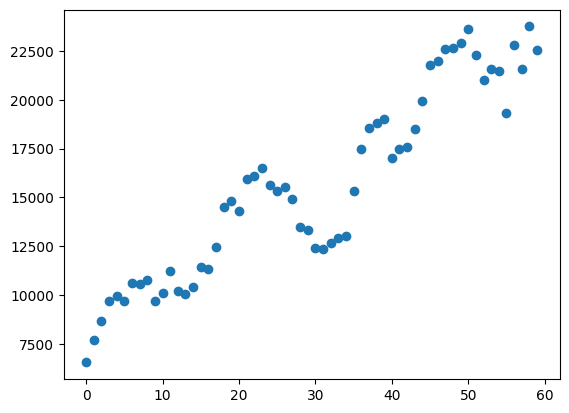

In [10]:
plt.scatter(range(60), df['총계 여'][0:60])
plt.show()

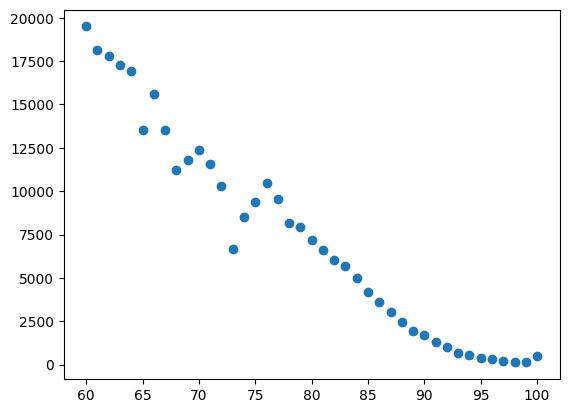

In [11]:
plt.scatter(range(60, 101), df['총계 여'][60:101])
plt.show()

## 최소제곱법

In [34]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.4 MB/s eta 0:00:00


In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_csv('/content/drive/MyDrive/데이터 과학과 머신러닝/population_2019.csv', encoding = 'cp949')

In [21]:
x = np.array(range(0, 60)).reshape(-1, 1)
y = np.array(df['총계 여'][0:60]).reshape(-1, 1)

In [27]:
model = LR(fit_intercept = True).fit(x, y)

In [29]:
type(model)

sklearn.linear_model._base.LinearRegression

In [42]:
model.coef_
model.intercept_

array([7988.76885246])

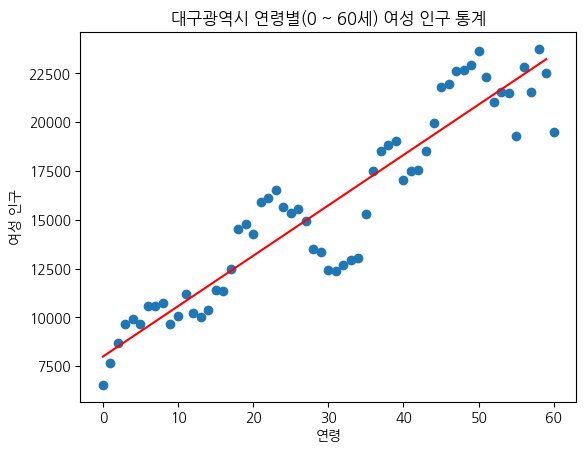

In [40]:
plt.title('대구광역시 연령별(0 ~ 60세) 여성 인구 통계')
plt.xlabel('연령', )
plt.ylabel('여성 인구')
plt.scatter(range(61), df['총계 여'][0:61])
plt.plot(x, model.predict(x), 'r')
#plt.plot(x, model.coef_ * x + model.intercept_, 'b')
plt.show()

In [41]:
x = np.array(range(61, 101)).reshape(-1, 1)
y = np.array(df['총계 여'][61:101]).reshape(-1, 1)

In [43]:
model = LR(fit_intercept = True).fit(x, y)

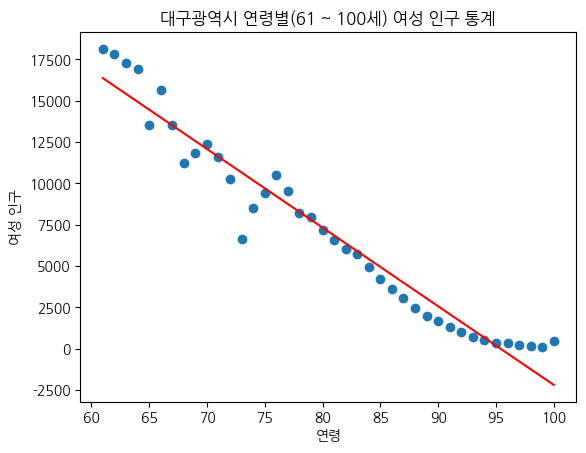

In [45]:
plt.title('대구광역시 연령별(61 ~ 100세) 여성 인구 통계')
plt.xlabel('연령', )
plt.ylabel('여성 인구')
plt.scatter(range(61, 101), df['총계 여'][61:101])
plt.plot(x, model.predict(x), 'r')
#plt.plot(x, model.coef_ * x + model.intercept_, 'b')
plt.show()